In [1]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
from numpy import logical_and as land, logical_or as lor
import seaborn as sn
from utilities import plot_boxplot, plot_hist, eval_correlation

In [4]:
DATA_PATH = 'G:/Shared drives/DM_tweets/data/'

In [39]:
DATA_PATH = 'drive/Shareddrives/DM_tweets/data/'

In [2]:
DATA_PATH = 'G:/Drive condivisi/DM_tweets/data/'

In [3]:
df_tweets = pd.read_csv(DATA_PATH+'tweets_clean.csv', sep='#')
df_users = pd.read_csv(DATA_PATH+'users_clean.csv', sep='#')

## Plotting correlation matrix

As it can be seen from the plot, even after the process of data cleaning, no relevant correlation is present neither in the tweets dataset nor the users dataset, so all attributes can be kept.

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:76: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_corr.corr(method=method)


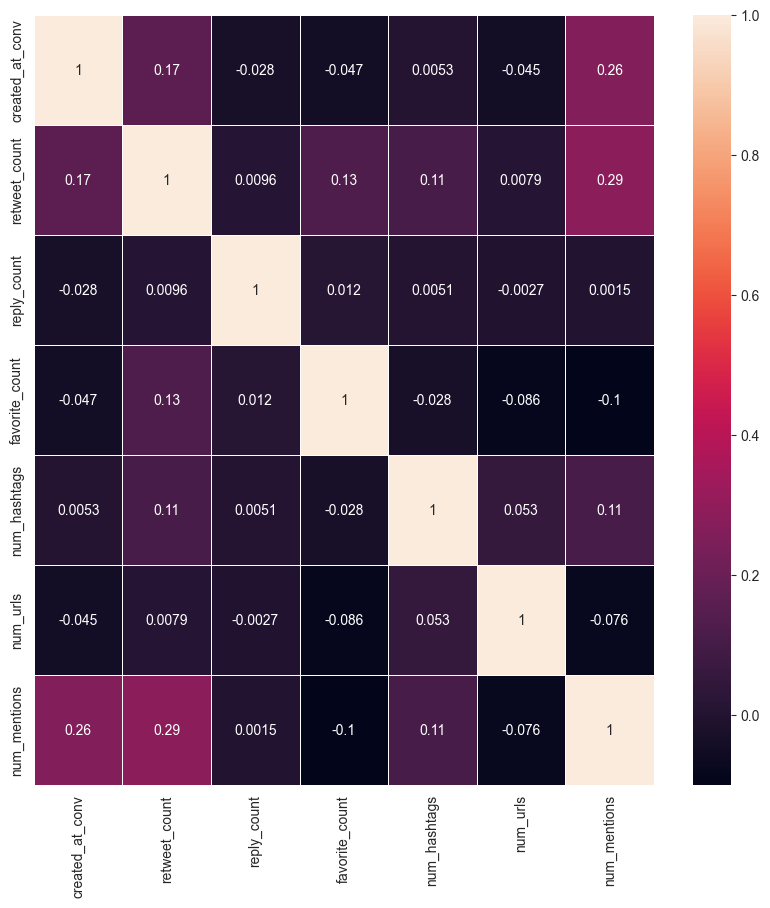

In [4]:
eval_correlation(df_tweets, 'spearman')

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:76: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_corr.corr(method=method)


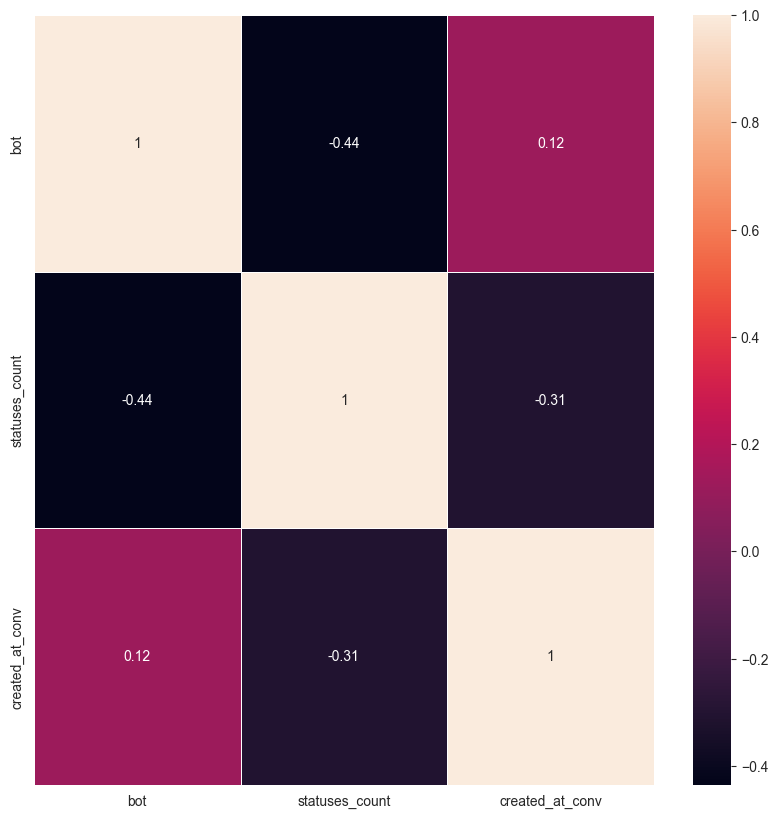

In [5]:
eval_correlation(df_users.drop(columns=['id']), 'spearman')

## Users Scatter plots

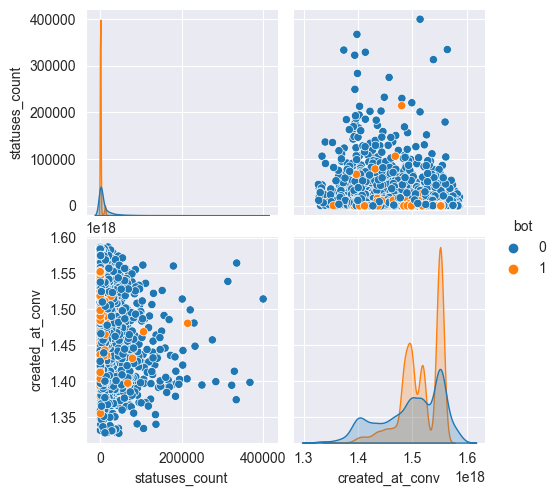

In [6]:
sn.pairplot(df_users.drop(columns=['id']), hue='bot')

Analyzing how, varying the date of creation of the user profile, the language of the user changes, it is possible to see that:


*   Almost all bots profiles were created between 2014 and 2019;
*   All users who have their language set either to 'it' or 'zh-cn' are bots;
*   All users with "ar", "da", "pl", "en-AU", "fil", "sv" and "zh-TW" are non-bot users

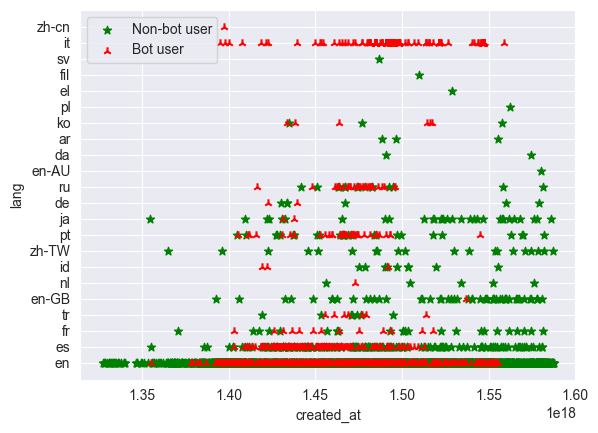

In [7]:
plt.scatter(df_users[df_users['bot'] == 0]['created_at_conv'], 
            df_users[df_users['bot'] == 0]['lang'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_users[df_users['bot'] == 1]['created_at_conv'], 
            df_users[df_users['bot'] == 1]['lang'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('lang')
plt.legend()
plt.show()

In [8]:
print('lower bound: ' + str(pd.to_datetime(1.40e18)))
print('upper bound: ' + str(pd.to_datetime(1.55e18)))

lower bound: 2014-05-13 16:53:20
upper bound: 2019-02-12 19:33:20


In [9]:
df_users[df_users['lang']=='sv']['bot'].value_counts()

0    1
Name: bot, dtype: int64

In [10]:
df_users[df_users['lang']=='fil']['bot'].value_counts()

0    1
Name: bot, dtype: int64

In [11]:
df_users[df_users['lang']=='el']['bot'].value_counts()

0    1
Name: bot, dtype: int64

In [12]:
df_users[df_users['lang']=='pl']['bot'].value_counts()

0    1
Name: bot, dtype: int64

In [13]:
df_users[df_users['lang']=='ar']['bot'].value_counts()

0    3
Name: bot, dtype: int64

In [14]:
df_users[df_users['lang']=='da']['bot'].value_counts()

0    2
Name: bot, dtype: int64

In [15]:
df_users[df_users['lang']=='en-AU']['bot'].value_counts()

0    1
Name: bot, dtype: int64

In [16]:
df_users[df_users['lang']=='zh-TW']['bot'].value_counts()

0    20
Name: bot, dtype: int64

In [17]:
df_users[df_users['lang']=='it']['bot'].value_counts()

1    906
Name: bot, dtype: int64

In [18]:
df_users[df_users['lang']=='zh-cn']['bot'].value_counts()

1    1
Name: bot, dtype: int64

Instead, always relatively to the data of creation, the statuses_count attribute is plotted. Very few bots have higher values of statuses_count, mostly the non-bot users have a greater number of posted tweets.

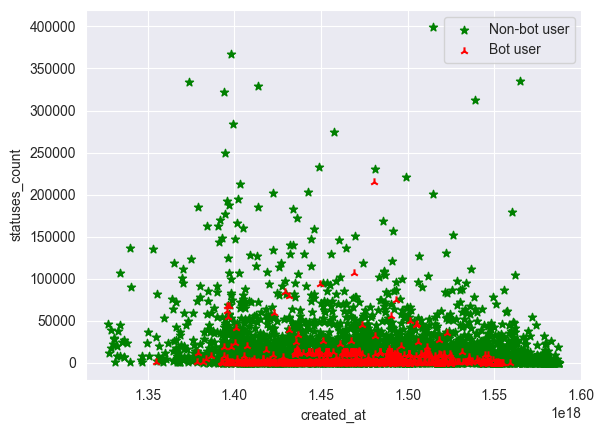

In [19]:
plt.scatter(df_users[df_users['bot'] == 0]['created_at_conv'], 
            df_users[df_users['bot'] == 0]['statuses_count'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_users[df_users['bot'] == 1]['created_at_conv'], 
            df_users[df_users['bot'] == 1]['statuses_count'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('statuses_count')
plt.legend()
plt.show()

## Tweets Scatter plots

**Retweet count**

Even after the process of data cleaning, the distribution remains skewed with a majority of values tending towards the value 0.

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:87: RuntimeWarning: divide by zero encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)


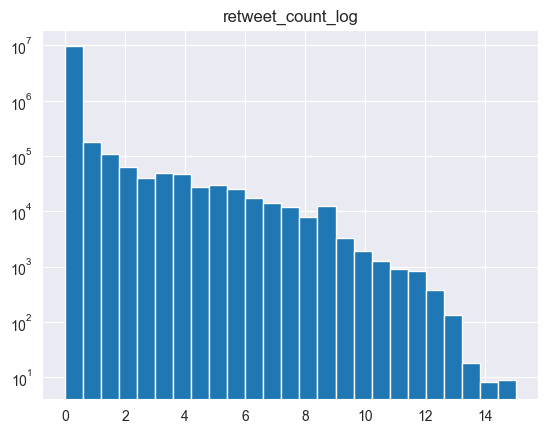

In [20]:
plot_hist(df_tweets, 'retweet_count', log=True)

W.r.t. the time of publishing of the tweet no special insights can be derived.

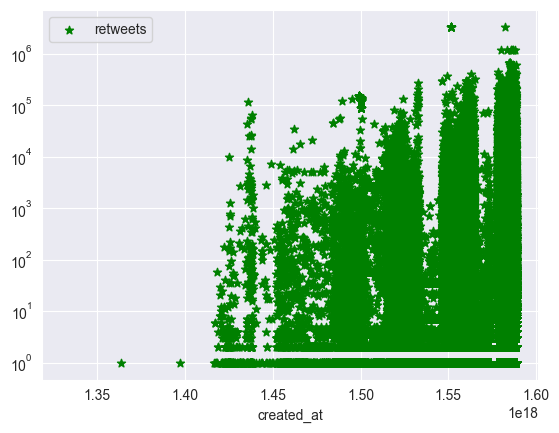

In [21]:
plt.scatter(df_tweets['created_at_conv'], 
            df_tweets['retweet_count'], color='g', marker='*', label='retweets')
plt.xlabel('created_at')
plt.yscale('log')
plt.legend()
plt.show()

**Favorite count**

As for the "retweet_count" attribute, the distribution has a peak near the values around 0.

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:87: RuntimeWarning: divide by zero encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)


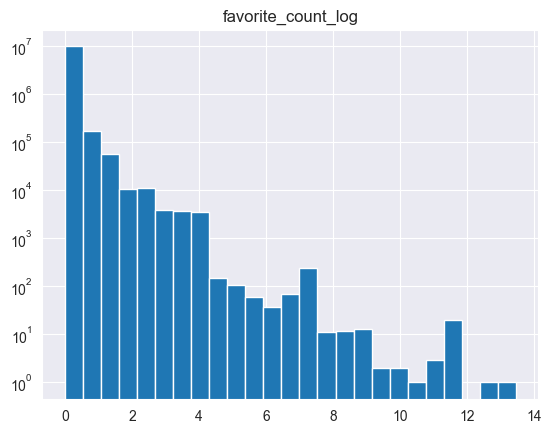

In [22]:
plot_hist(df_tweets, 'favorite_count', log=True)

Unlike for the previous attribute, w.r.t. the time of publishing of the tweet, here we have a presence of tweets with a higher number of favorites near the most recent dates.

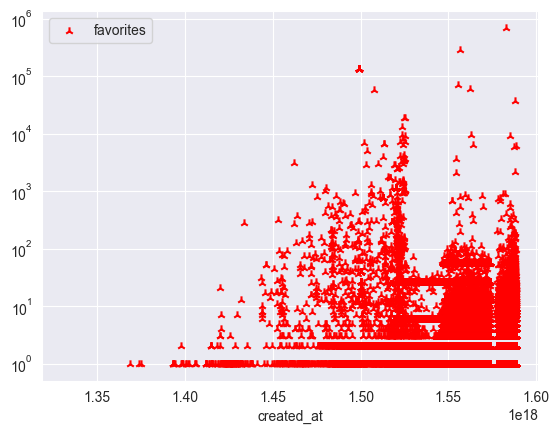

In [23]:
plt.scatter(df_tweets['created_at_conv'], 
            df_tweets['favorite_count'], color='r', marker='2', label='favorites')
plt.xlabel('created_at')
plt.yscale('log')
plt.legend()
plt.show()

**Reply count**

The distribution is similar to the previously analyzed attributes of the tweets file.

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:87: RuntimeWarning: divide by zero encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)


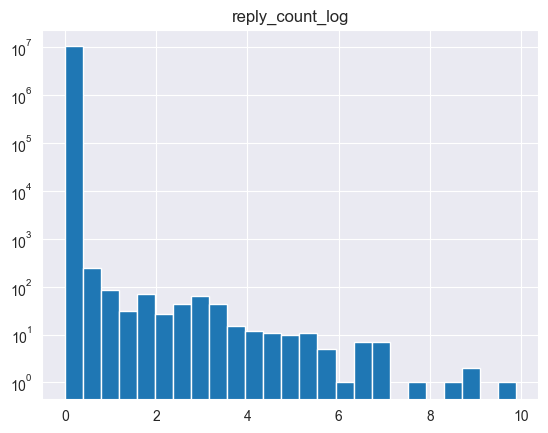

In [24]:
plot_hist(df_tweets, 'reply_count', log=True)

Here, like in the favorites attribute, we have a higher number of replies in the most recent dates.

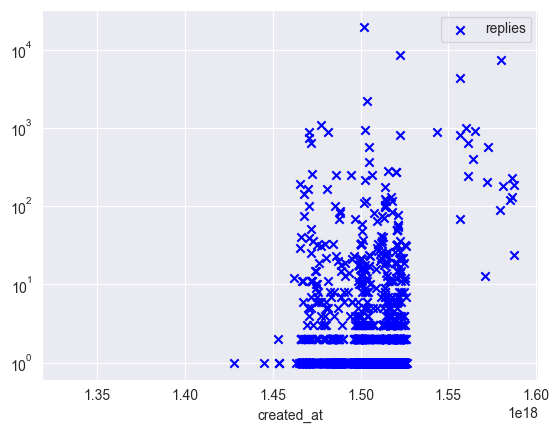

In [25]:
plt.scatter(df_tweets['created_at_conv'], 
            df_tweets['reply_count'], color='b', marker='x', label='replies')
plt.xlabel('created_at')
plt.yscale('log')
plt.legend()
plt.show()

For the following attributes, they present the same characteristics as the ones described above: their distributions are skewed and most of the higher values are near the most recent timestamps.

**Num hashtags**

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:87: RuntimeWarning: divide by zero encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)


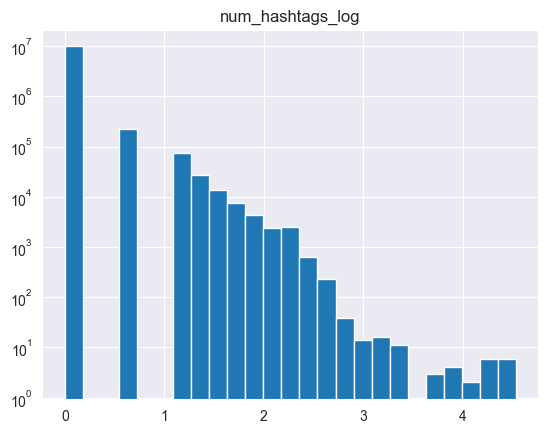

In [26]:
plot_hist(df_tweets, 'num_hashtags', log=True)

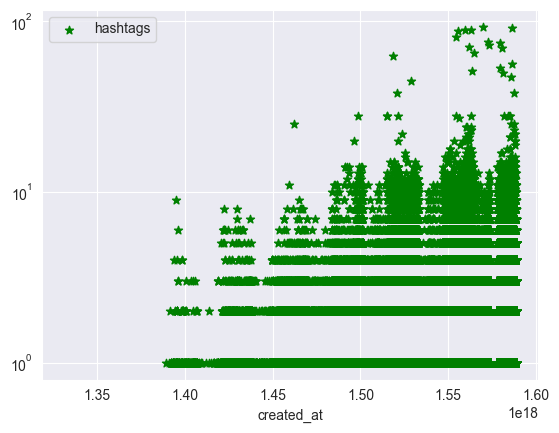

In [27]:
plt.scatter(df_tweets['created_at_conv'], 
            df_tweets['num_hashtags'], color='g', marker='*', label='hashtags')
plt.xlabel('created_at')
plt.yscale('log')
plt.legend()
plt.show()

**Num urls**

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:87: RuntimeWarning: divide by zero encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)


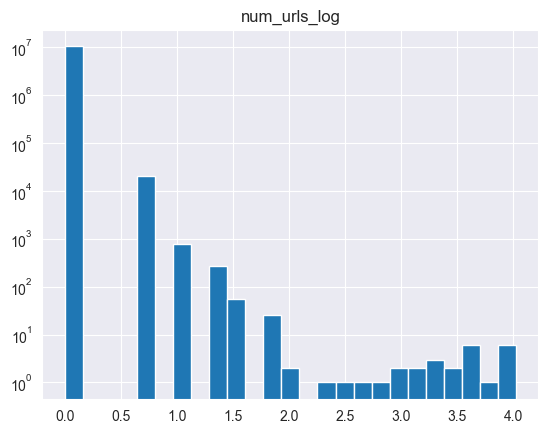

In [28]:
plot_hist(df_tweets, 'num_urls', log=True)

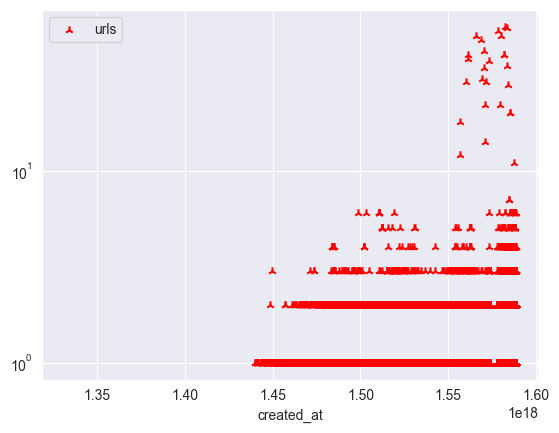

In [29]:
plt.scatter(df_tweets['created_at_conv'], 
            df_tweets['num_urls'], color='r', marker='2', label='urls')
plt.xlabel('created_at')
plt.yscale('log')
plt.legend()
plt.show()

**Num mentions**

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:87: RuntimeWarning: divide by zero encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)


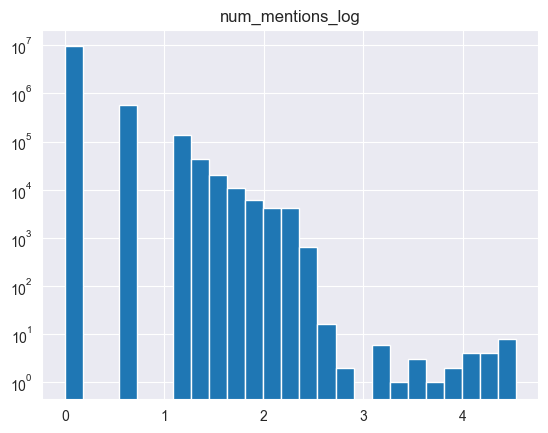

In [30]:
plot_hist(df_tweets, 'num_mentions', log=True)

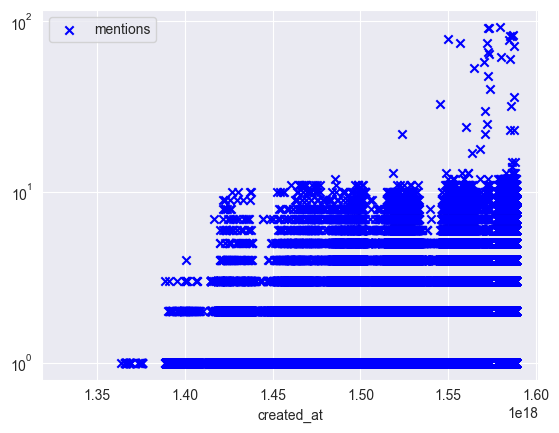

In [31]:
plt.scatter(df_tweets['created_at_conv'], 
            df_tweets['num_mentions'], color='b', marker='x', label='mentions')
plt.xlabel('created_at')
plt.yscale('log')
plt.legend()
plt.show()

## Users and Tweets Scatter plots

In [32]:
df_users.id = df_users.id.astype(str)
df_merge = df_tweets.merge(df_users, left_on="user_id", right_on="id", how="right")

In [33]:
df_merge.drop(columns=['id', 'name'], inplace=True)

Analyzing the attributes correlation by merging the two dataframes by "user_id" (respectively "id" in the users file) in such a way that all tweets posted by a user not present in the users file have been dropped it is possible to see that there are no significant correlations between data.

At best we can see a little bit of negative correlation between the attributes "num_mentions" and "bot" or "bot" and "statuses_count", and a positive one between "created_at_conv" of the tweets and the number of statuses posted by the tweet, but they are not really significant because the value is still too much near 0 (which means they aren't correlated).

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:76: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_corr.corr(method=method)


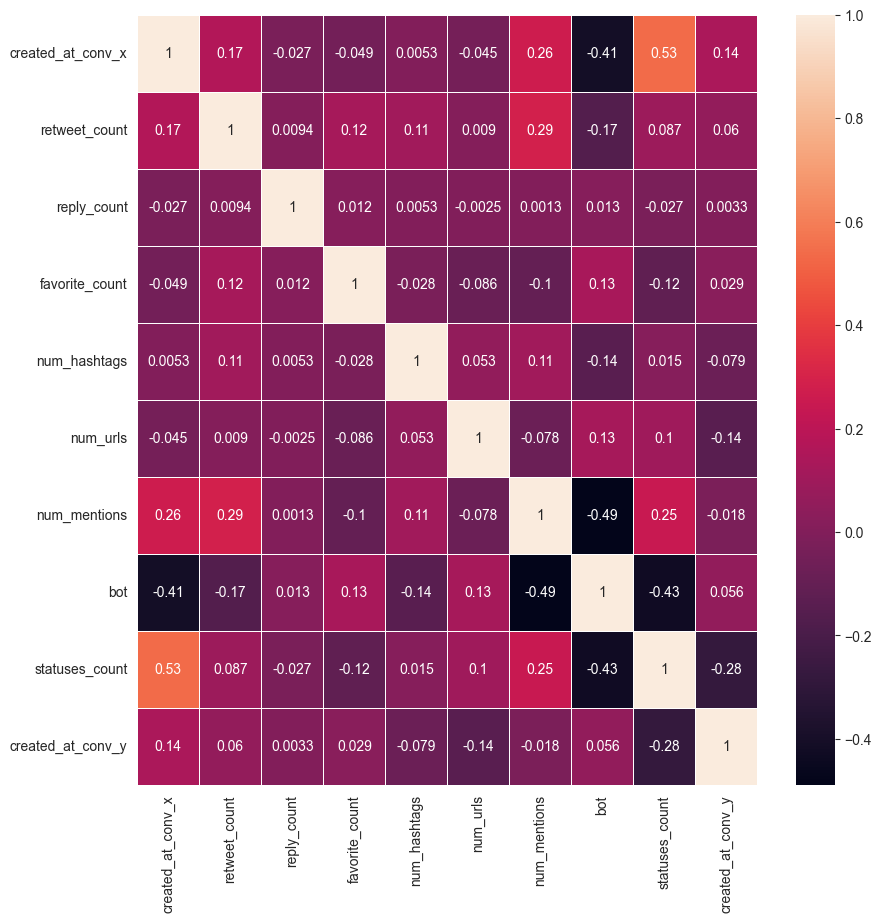

In [34]:
eval_correlation(df_merge, 'spearman')

Now it is possible to analyze the attributes of the tweets w.r.t. the "bot" class and derive the behavior of the users who are bots and the ones which aren't bots.

Almost all of the users who have higher retweet counts are non-bot users, which makes sense since they are most likely to be shared by other users, unlike tweets coming from bots which could often be spam and thus not be noticed by the Twitter community.

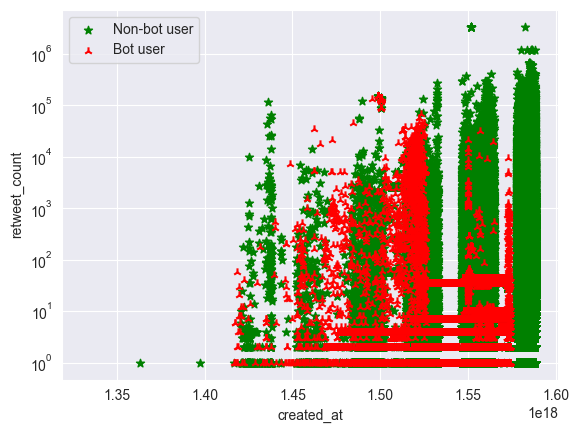

In [35]:
plt.scatter(df_merge[df_merge['bot'] == 0]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 0]['retweet_count'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_merge[df_merge['bot'] == 1]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 1]['retweet_count'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('retweet_count')
plt.yscale('log')
plt.legend()
plt.show()

A different situation arises when we consider the favorites, here they are  without any difference for bots and non-bots. The only different value registered is from a bot user with a really high number of favorites to one of its tweets.

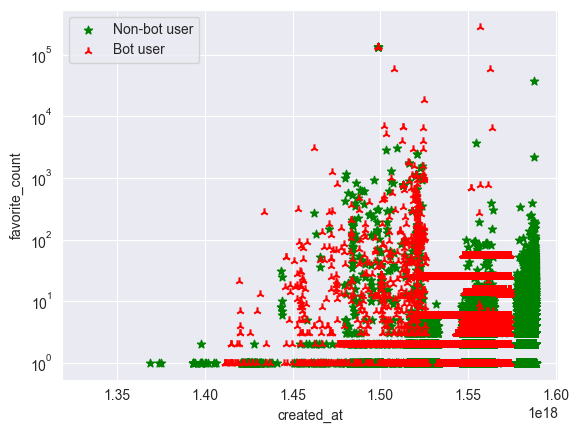

In [36]:
plt.scatter(df_merge[df_merge['bot'] == 0]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 0]['favorite_count'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_merge[df_merge['bot'] == 1]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 1]['favorite_count'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('favorite_count')
plt.yscale('log')
plt.legend()
plt.show()

For the number of replies, there is a trend inverse to the one of the retweets: most of the tweets which have a lot of replies are, surprisingly, published by bots.

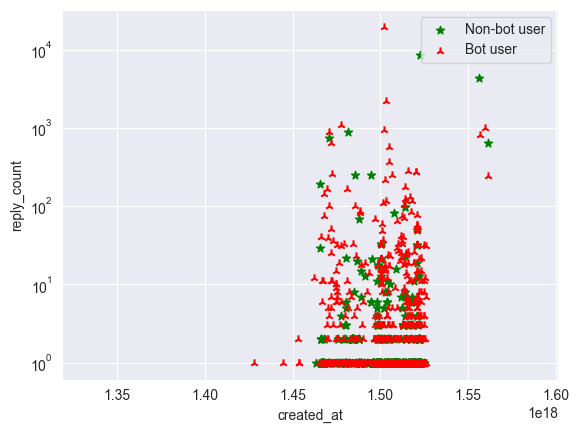

In [37]:
plt.scatter(df_merge[df_merge['bot'] == 0]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 0]['reply_count'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_merge[df_merge['bot'] == 1]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 1]['reply_count'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('reply_count')
plt.yscale('log')
plt.legend()
plt.show()

For num_hashtags, num_urls and num_mentions the trend is similar between bots and non-bots.

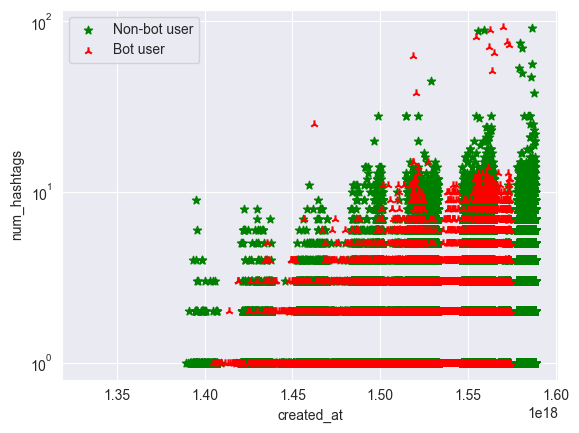

In [38]:
plt.scatter(df_merge[df_merge['bot'] == 0]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 0]['num_hashtags'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_merge[df_merge['bot'] == 1]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 1]['num_hashtags'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('num_hashtags')
plt.yscale('log')
plt.legend()
plt.show()

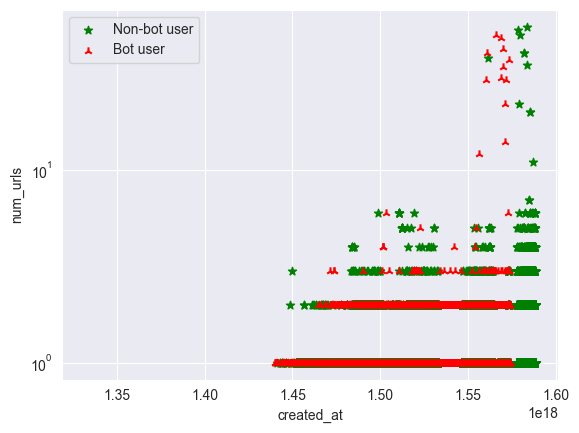

In [39]:
plt.scatter(df_merge[df_merge['bot'] == 0]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 0]['num_urls'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_merge[df_merge['bot'] == 1]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 1]['num_urls'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('num_urls')
plt.yscale('log')
plt.legend()
plt.show()

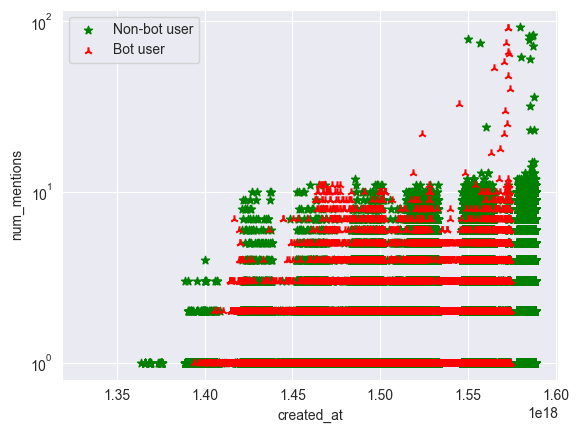

In [40]:
plt.scatter(df_merge[df_merge['bot'] == 0]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 0]['num_mentions'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_merge[df_merge['bot'] == 1]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 1]['num_mentions'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('num_mentions')
plt.yscale('log')
plt.legend()
plt.show()

From the following plots it is possible to see for each of them if the users with the highest values are bots or not and which language their profile is set to.


*  Users with highest numbers of retweets are non-bots whose languages are "en", "zh-TW" and "sv";
*   For favorites we have bots with "en", "pt" and "ru" as languages;
*   For replies we have a bot with "ko";
*   For "num_hashtags" we have mostly users who post in English ("en") but they are pretty varied among bots and non-bots, and some bots who post in Italian ("it");
*   For "num_urls" we have a similar situation as to "num_hashtags";
*   For "num_mentions" is similar to "num_hashtags" and "num_urls";




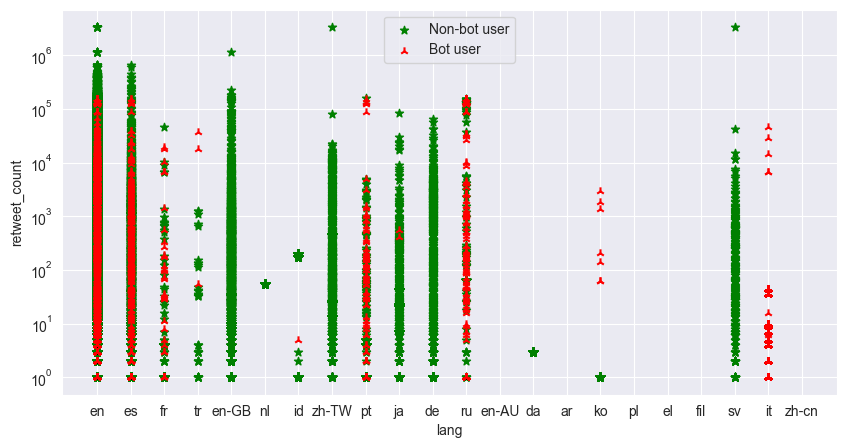

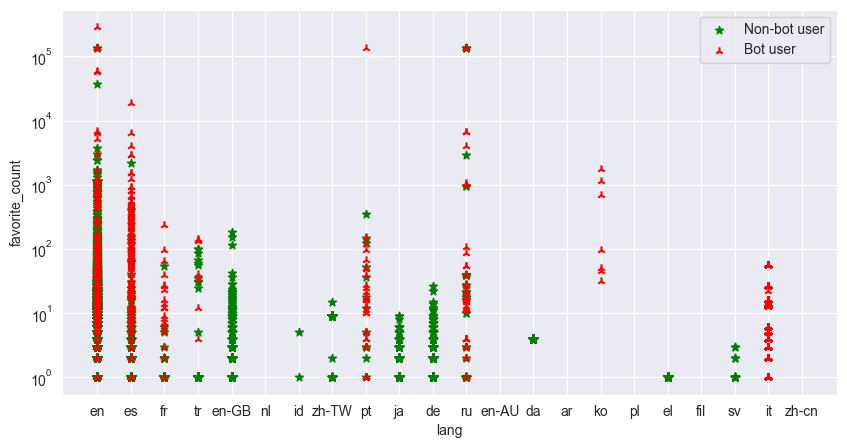

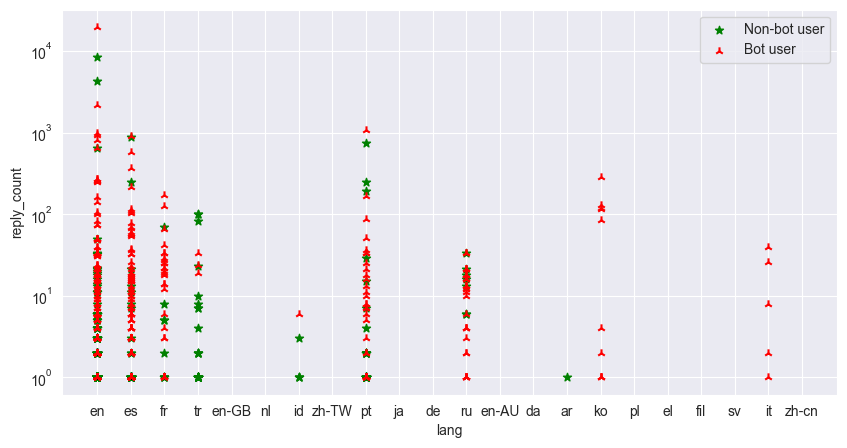

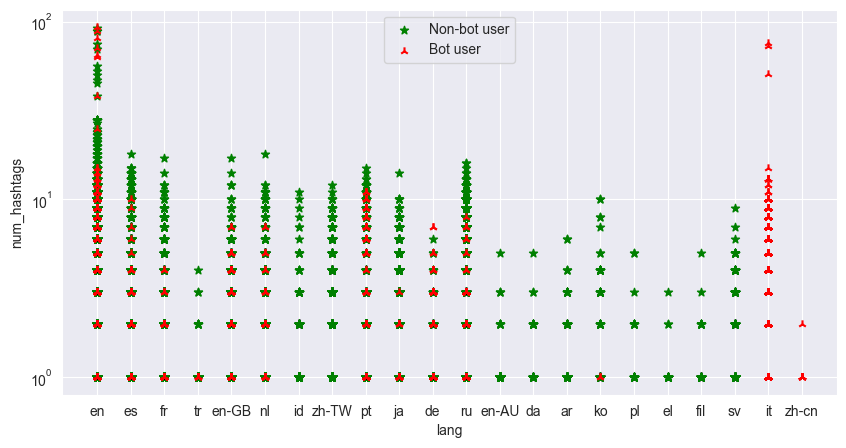

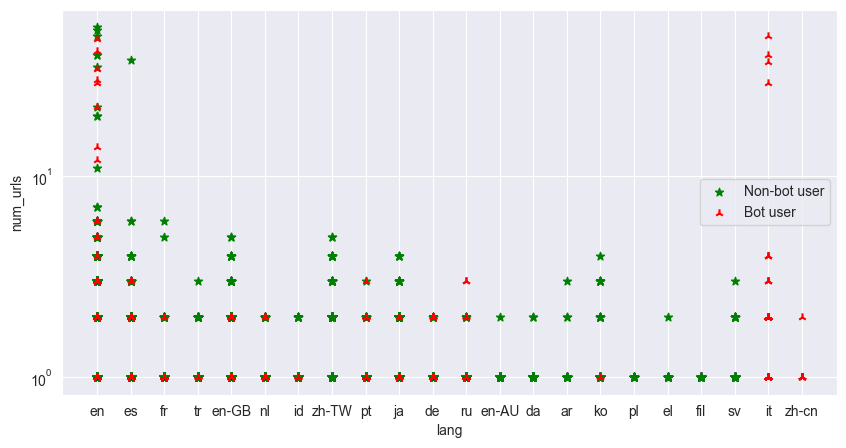

C:\Users\Alessandro\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


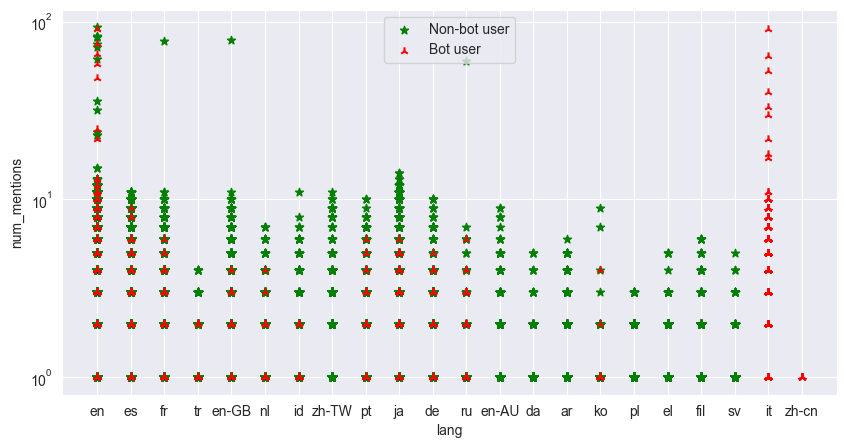

In [41]:
for attr in ['retweet_count', 'favorite_count', 'reply_count', 'num_hashtags', 'num_urls', 'num_mentions']:
  plt.figure(figsize=(10,5))
  plt.scatter(df_merge[df_merge['bot'] == 0]['lang'], 
              df_merge[df_merge['bot'] == 0][attr], color='g', marker='*', label='Non-bot user')
  plt.scatter(df_merge[df_merge['bot'] == 1]['lang'], 
              df_merge[df_merge['bot'] == 1][attr], color='r', marker='2', label='Bot user')
  plt.xlabel('lang')
  plt.ylabel(attr)
  plt.yscale('log')
  plt.legend()
  plt.show()

# Plots of tweets with new indicators

In [42]:
df_tweets_ind = pd.read_csv(DATA_PATH+'tweets_with_indicators.csv', sep='#')

In [43]:
df_indicators = pd.read_csv(DATA_PATH+'indicators.csv', sep='#')

In [44]:
df_tweets_ind.shape

(10187873, 13)

Most attributes are not correlated in away way, only some slight exceptions appear:

*  "special_chars" is a little bit correlated with the number of URLs, which makes sense since to write a URL you need many special characters (e.g. "/", ".");
*   The length of the tweet and the number of special characters;



C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:76: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_corr.corr(method=method)


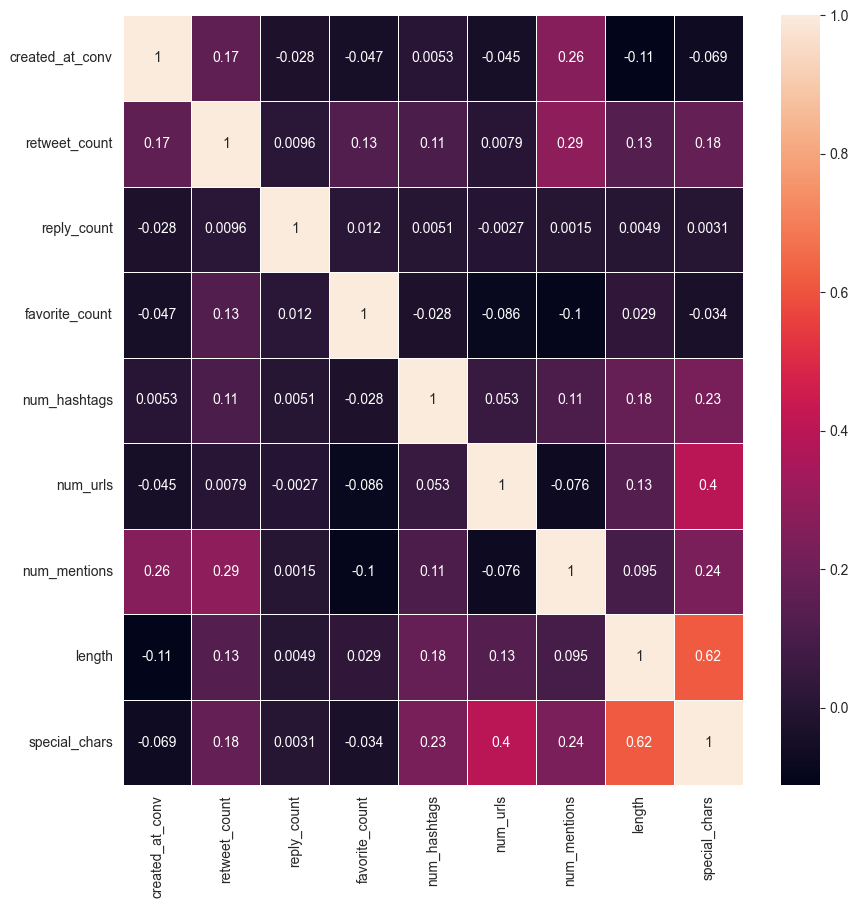

In [45]:
eval_correlation(df_tweets_ind, 'spearman')

Among the users' indicators there are higher correlations between the mean and standard deviation of the same attribute except for the "retweet_count" attribute, but there are a couple of special cases to analyze:



*   The mean length of a tweet of a user has a correlation of 0.88 with the mean number of special characters the users inserts in their tweets;
*   The "n_tweets" attribute has the maximum value of correlation with the "tweeting_regularity" attribute;
*  Also, the total number of tweets posted by a certain user has a high correlation of 0.91 with the maximum number of tweets that were posted in a day by that user, which of course makes sense given the fact that the more tweets a user has published the more it will have probably posted in a day w.r.t. a user which has maybe only a couple of tweets;

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:76: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_corr.corr(method=method)


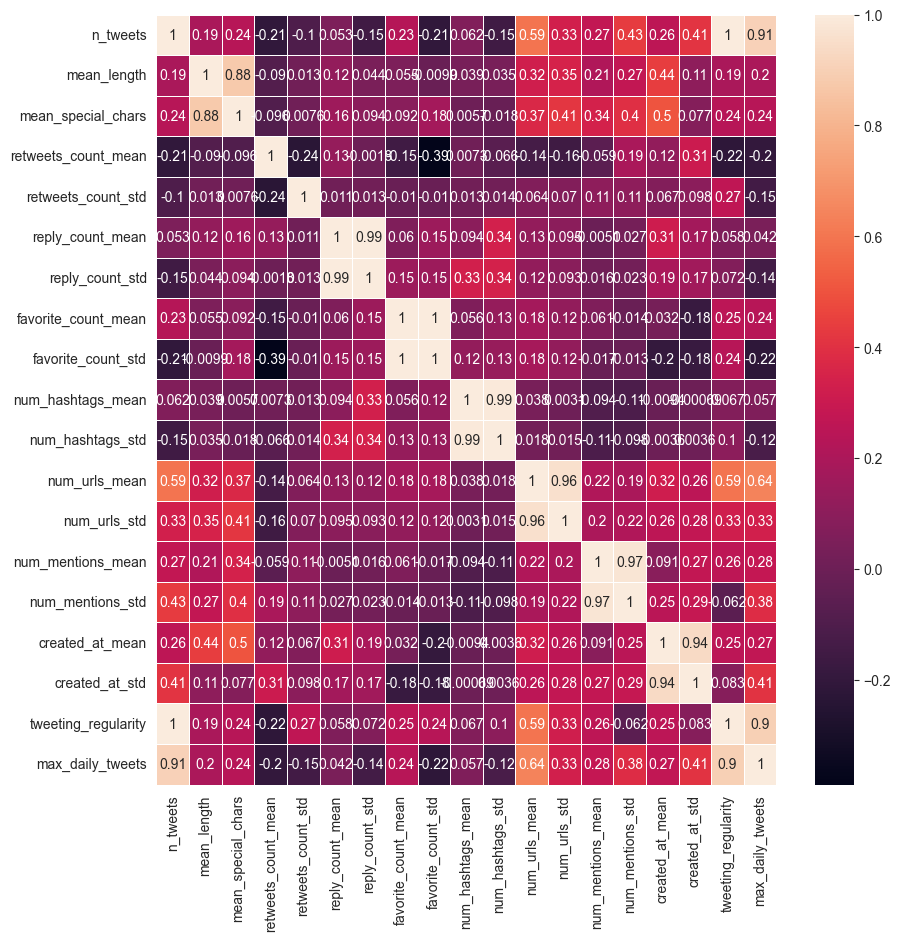

In [46]:
eval_correlation(df_indicators.drop(columns=[str(y)+'_tweets' for y in range(2012,2021)]), 'spearman')

The length of the tweet w.r.t. the number of retweets reveals that shorter tweets have the highest number of retweets

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


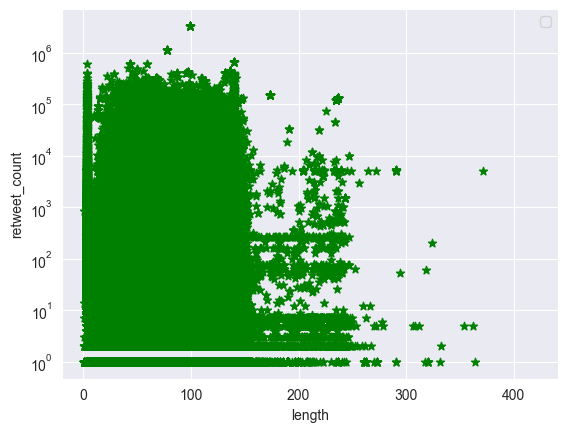

In [47]:
plt.scatter(df_tweets_ind['length'], 
            df_tweets_ind['retweet_count'], color='g', marker='*')
plt.xlabel('length')
plt.ylabel('retweet_count')
plt.yscale('log')
plt.legend()
plt.show()

From the following plot it is noticeable how the tweets with more retweets have few special characters in the tweet.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


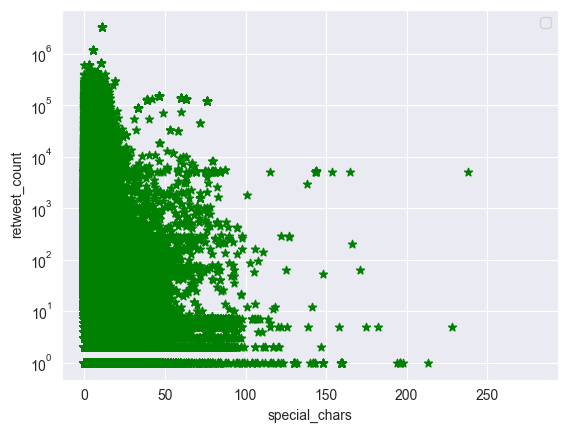

In [48]:
plt.scatter(df_tweets_ind['special_chars'], 
            df_tweets_ind['retweet_count'], color='g', marker='*')
plt.xlabel('special_chars')
plt.ylabel('retweet_count')
plt.yscale('log')
plt.legend()
plt.show()

In [49]:
df_users.id = df_users.id.astype(str)
df_merge = df_users.merge(df_indicators, left_on="id", right_on ="user_id", how="right")

In [50]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140543 entries, 0 to 140542
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   11504 non-null   object 
 1   name                 11503 non-null   object 
 2   lang                 11504 non-null   object 
 3   bot                  11504 non-null   float64
 4   created_at           11504 non-null   object 
 5   statuses_count       11504 non-null   float64
 6   created_at_conv      11504 non-null   float64
 7   user_id              140543 non-null  object 
 8   n_tweets             140543 non-null  int64  
 9   2012_tweets          140543 non-null  int64  
 10  2013_tweets          140543 non-null  int64  
 11  2014_tweets          140543 non-null  int64  
 12  2015_tweets          140543 non-null  int64  
 13  2016_tweets          140543 non-null  int64  
 14  2017_tweets          140543 non-null  int64  
 15  2018_tweets      

Plotting the scatter of the language attribute and the average length of the tweet w.r.t. each user it is possible to se that users with the higher length of tweets have their language set to "en", "ko" and "ru". 
The ones with a shorter length in average are for example "id", "el", "da", "en-AU", etc.

Mostly, users who are and aren't bots behave similarly; only in "pt" and "ko" we have bots who post with a length averagely higher than most other users with that language.

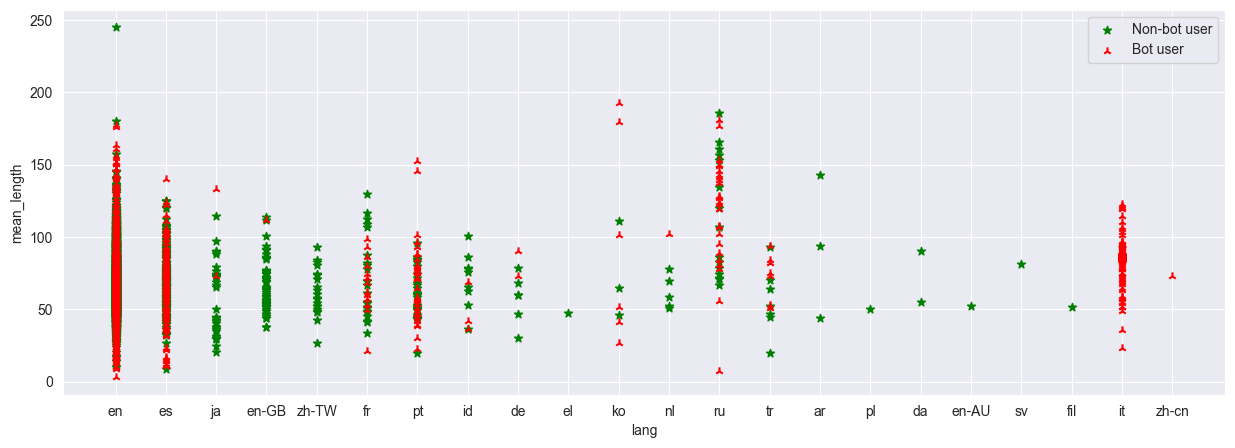

In [51]:
plt.figure(figsize=(15,5))
plt.scatter(df_merge[df_merge['bot'] == 0]['lang'], 
            df_merge[df_merge['bot'] == 0]['mean_length'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_merge[df_merge['bot'] == 1]['lang'], 
            df_merge[df_merge['bot'] == 1]['mean_length'], color='r', marker='2', label='Bot user')
plt.xlabel('lang')
plt.ylabel('mean_length')
plt.legend()
plt.show()

For the number of special character, instead, the languages are "en", "ko" and "ja". Less special characters are used instead by users of languages "ar", "pl", "da", etc.

In most languages there is no difference between bots and non-bots, but in languages "ja", "pt" and "ko" the tweets with most special characters are from bots.

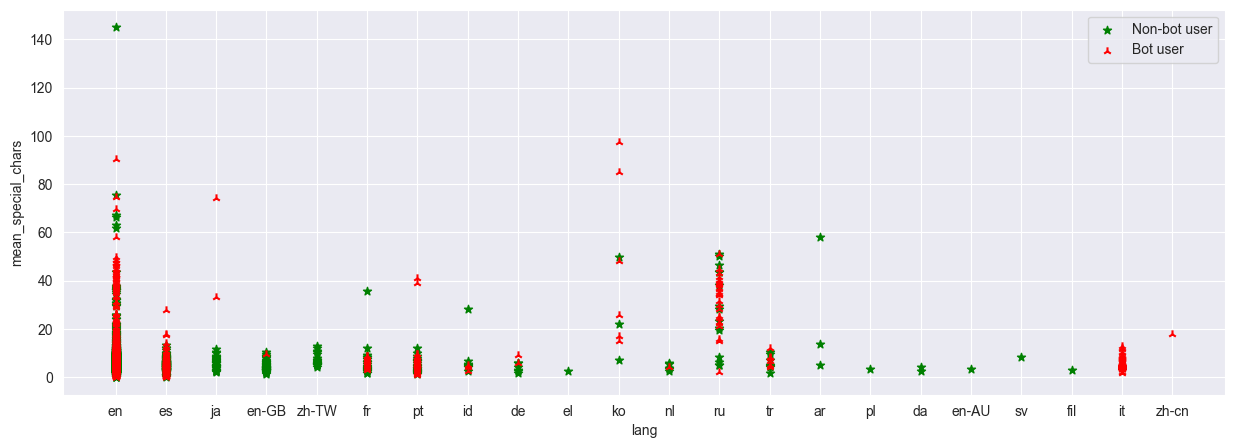

In [52]:
plt.figure(figsize=(15,5))
plt.scatter(df_merge[df_merge['bot'] == 0]['lang'], 
            df_merge[df_merge['bot'] == 0]['mean_special_chars'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_merge[df_merge['bot'] == 1]['lang'], 
            df_merge[df_merge['bot'] == 1]['mean_special_chars'], color='r', marker='2', label='Bot user')
plt.xlabel('lang')
plt.ylabel('mean_special_chars')
plt.legend()
plt.show()

In the following cell it is plot a scatterplot w.r.t. the language of the user and the total number of tweets published by that user.
Some users from certain languages (e.g. "en-AU" or "fil") have only users with a high number of tweets, unlike users with their language set to "zn-ch" which have a lower number of tweets.
Other languages have their users with an higher variance, thus covering both the case of having few tweets or, instead, a lot of them.

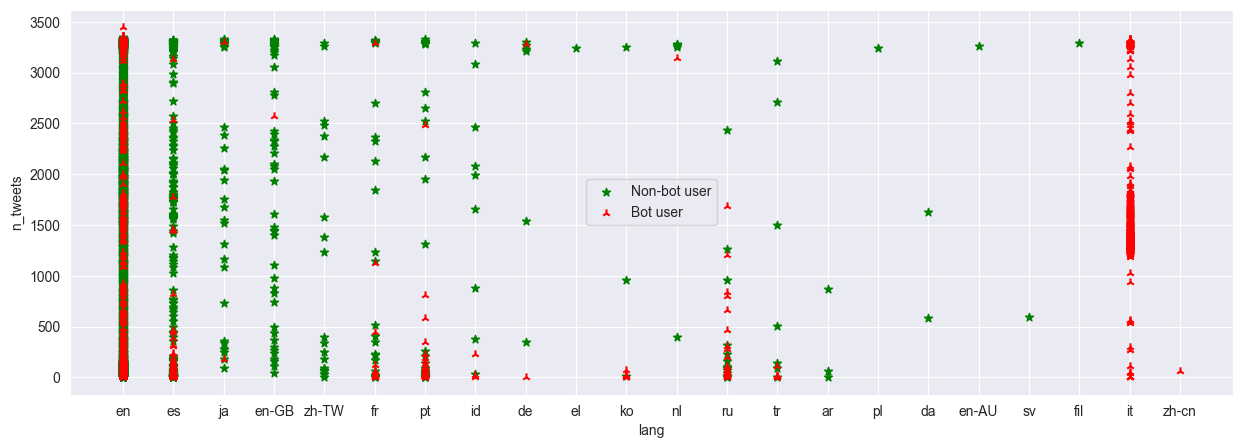

In [53]:
plt.figure(figsize=(15,5))
plt.scatter(df_merge[df_merge['bot'] == 0]['lang'], 
            df_merge[df_merge['bot'] == 0]['n_tweets'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_merge[df_merge['bot'] == 1]['lang'], 
            df_merge[df_merge['bot'] == 1]['n_tweets'], color='r', marker='2', label='Bot user')
plt.xlabel('lang')
plt.ylabel('n_tweets')
plt.legend()
plt.show()

From the different years, we can see how more and more tweets have been published, maybe because the popularity of Twitter increased.

<BarContainer object of 9 artists>

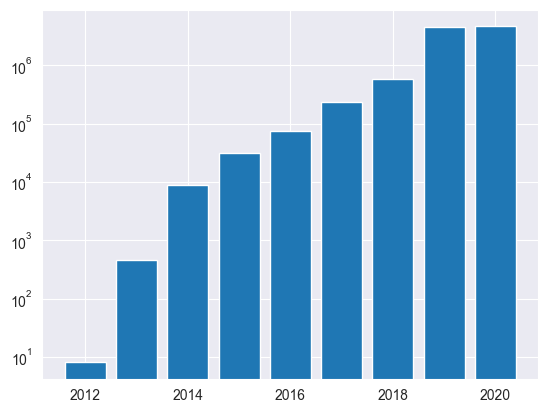

In [54]:
years_col_list = [str(y)+'_tweets' for y in range(2012,2021)]
sum_list = [df_indicators[y].sum() for y in years_col_list]
plt.bar(range(2012,2021), sum_list, log=True)

In [55]:
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140543 entries, 0 to 140542
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              140543 non-null  object 
 1   n_tweets             140543 non-null  int64  
 2   2012_tweets          140543 non-null  int64  
 3   2013_tweets          140543 non-null  int64  
 4   2014_tweets          140543 non-null  int64  
 5   2015_tweets          140543 non-null  int64  
 6   2016_tweets          140543 non-null  int64  
 7   2017_tweets          140543 non-null  int64  
 8   2018_tweets          140543 non-null  int64  
 9   2019_tweets          140543 non-null  int64  
 10  2020_tweets          140543 non-null  int64  
 11  mean_length          140543 non-null  float64
 12  mean_special_chars   140543 non-null  float64
 13  retweets_count_mean  140543 non-null  float64
 14  retweets_count_std   13781 non-null   float64
 15  reply_count_mean 

In [56]:
df_indicators.drop(columns=['n_tweets', 'tweeting_regularity', 'mean_special_chars', 'reply_count_std', 'favorite_count_std',
                            'num_hashtags_std', 'num_urls_std', 'num_mentions_std', 'created_at_std'], inplace=True)

In [57]:
df_indicators.to_csv(path_or_buf=DATA_PATH+'indicators_clean.csv', sep='#', index=False)